In [2]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from IPython.display import Audio
import IPython.display as ipd
import warnings
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import math
from keras.utils import np_utils
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Reading the audio files and putting them in a dataframe

In [3]:
crema_path='/kaggle/input/speech-emotion-recognition-en/Crema'
crema=[]
for wav in os.listdir(crema_path):
    emotion=wav.partition(".wav")[0].split('_')
    if emotion[2]=='SAD':
        crema.append(('Sad',crema_path+'/'+wav))
    elif emotion[2]=='ANG':
        crema.append(('Angry',crema_path+'/'+wav))
    elif emotion[2]=='DIS':
        crema.append(('Disgust',crema_path+'/'+wav))
    elif emotion[2]=='FEA':
        crema.append(('Fear',crema_path+'/'+wav))
    elif emotion[2]=='HAP':
        crema.append(('Happy',crema_path+'/'+wav))
    elif emotion[2]=='NEU':
        crema.append(('Neutral',crema_path+'/'+wav))
    else:
        crema.append(('unknown',crema_path+'/'+wav))
crema_df=pd.DataFrame.from_dict(crema)
crema_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
crema_df.head()

,Emotion,File_Path
0,Disgust,/kaggle/input/speech-emotion-recognition-en/Cr...
1,Happy,/kaggle/input/speech-emotion-recognition-en/Cr...
2,Happy,/kaggle/input/speech-emotion-recognition-en/Cr...
3,Disgust,/kaggle/input/speech-emotion-recognition-en/Cr...
4,Disgust,/kaggle/input/speech-emotion-recognition-en/Cr...


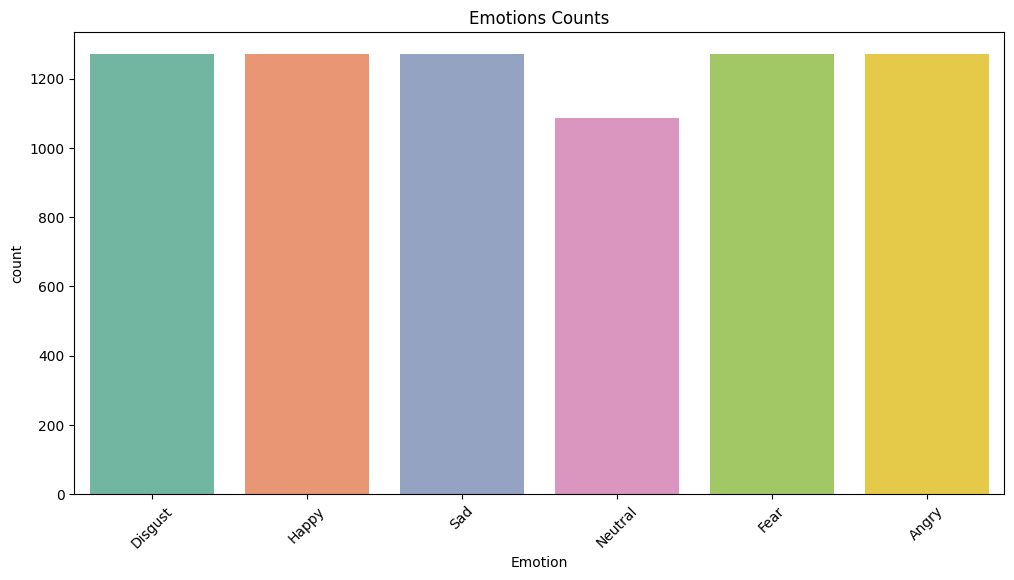

In [4]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=crema_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [5]:
def plot_and_listen(emotion):
    filepath=crema_df[crema_df["Emotion"]==emotion].iloc[0][1]
    data,sr=librosa.load(filepath)
    print("a- Wave Plot for audio signal")
    plt.title("Waveplot for audio with " + emotion + " emotion.", fontdict=dict(size=15))
    librosa.display.waveshow(data, sr=sr )
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Amplitude', fontdict=dict(size=15))
    plt.pause(0.02)
    plt.show()
    print("b- Listen to the "+emotion +" voice")
    display(ipd.Audio(data, rate=sr ))

Disgust Emotion
a- Wave Plot for audio signal


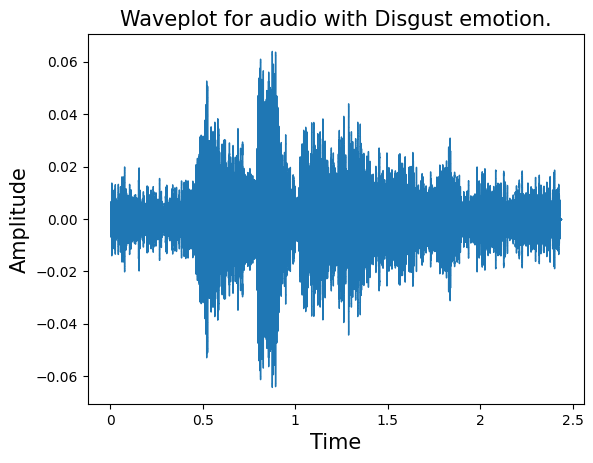

b- Listen to the Disgust voice


Happy Emotion
a- Wave Plot for audio signal


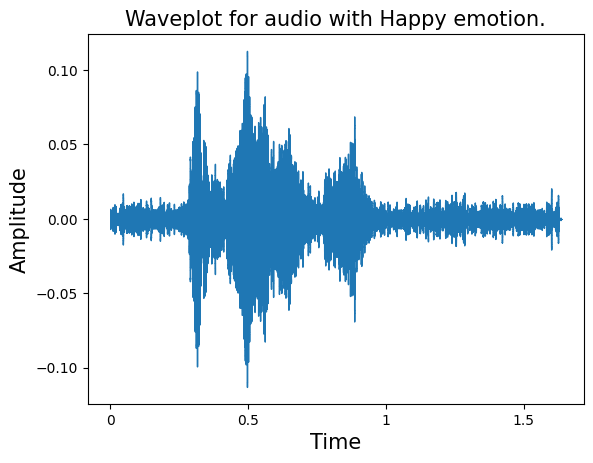

b- Listen to the Happy voice


Sad Emotion
a- Wave Plot for audio signal


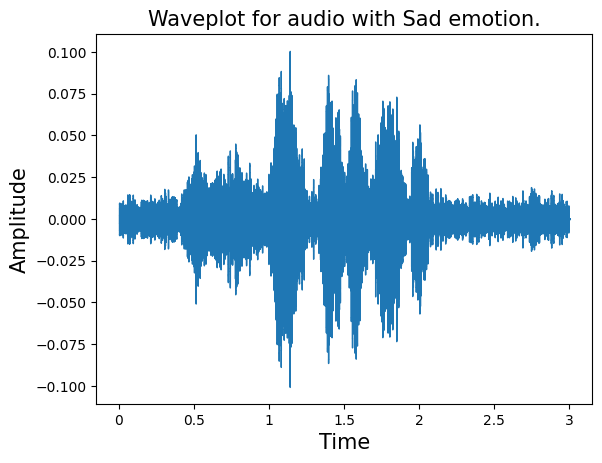

b- Listen to the Sad voice


Neutral Emotion
a- Wave Plot for audio signal


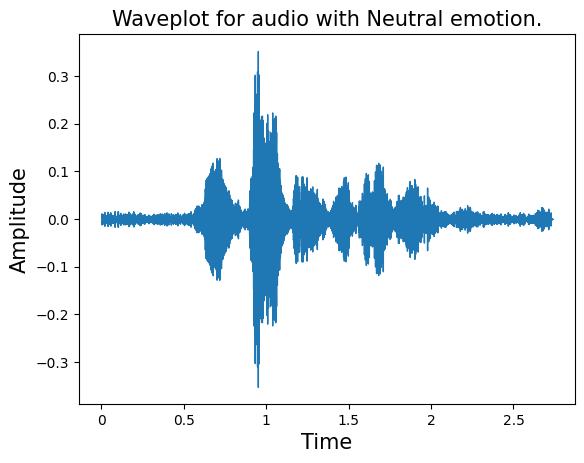

b- Listen to the Neutral voice


Fear Emotion
a- Wave Plot for audio signal


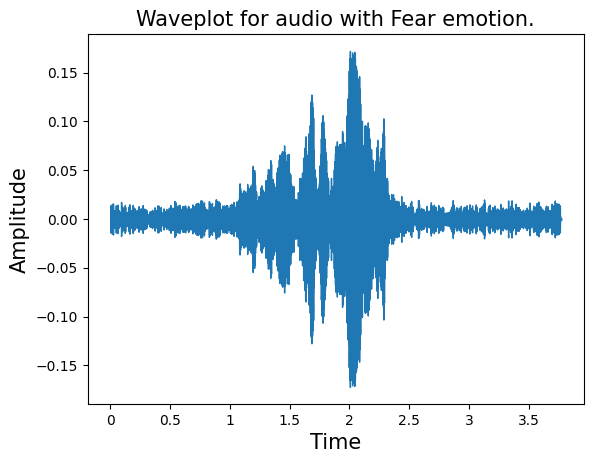

b- Listen to the Fear voice


Angry Emotion
a- Wave Plot for audio signal


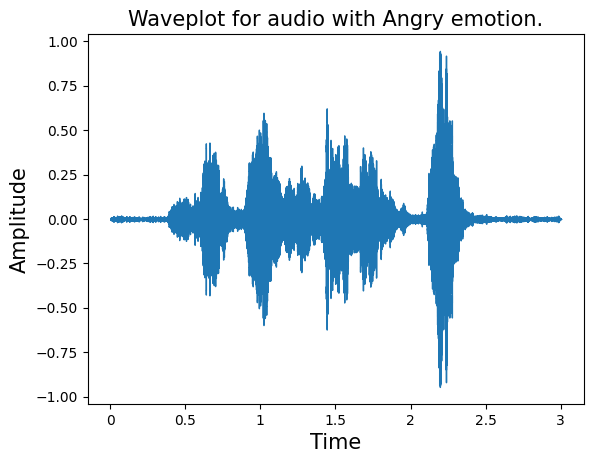

b- Listen to the Angry voice


In [6]:
for emotion in crema_df["Emotion"].unique():
    print(emotion+" Emotion")
    plot_and_listen(emotion)
    print("==========================================================================")

In [7]:
audio_arrays = []
for i in crema_df['File_Path']:
    x, sr = librosa.load(i,duration=2)
    audio_arrays.append(x)
crema_df['Arrays'] = audio_arrays

In [8]:
crema_df

,Emotion,File_Path,Arrays
0,Disgust,/kaggle/input/speech-emotion-recognition-en/Cr...,"[0.0051987115, 0.0065078777, 0.0063527757, 0.0..."
1,Happy,/kaggle/input/speech-emotion-recognition-en/Cr...,"[-0.0054751206, -0.0067585437, -0.0058223438, ..."
2,Happy,/kaggle/input/speech-emotion-recognition-en/Cr...,"[-2.10721e-05, 0.00036462393, 0.00048545774, 0..."
3,Disgust,/kaggle/input/speech-emotion-recognition-en/Cr...,"[0.0027296818, 0.0009894323, -0.00012592837, 0..."
4,Disgust,/kaggle/input/speech-emotion-recognition-en/Cr...,"[-0.0012989982, -0.0013569102, -0.0005801881, ..."
...,...,...,...
7437,Angry,/kaggle/input/speech-emotion-recognition-en/Cr...,"[0.006019091, 0.006769056, 0.005675522, 0.0059..."
7438,Angry,/kaggle/input/speech-emotion-recognition-en/Cr...,"[-0.00096016855, -0.0015201073, -0.0016187193,..."
7439,Angry,/kaggle/input/speech-emotion-recognition-en/Cr...,"[0.0013364321, 0.0018099947, 0.0025515985, 0.0..."
7440,Sad,/kaggle/input/speech-emotion-recognition-en/Cr...,"[0.0010454531, 0.0015824048, 0.0008037546, 0.0..."


In [12]:
X_data=crema_df.drop(labels='Emotion',axis=1)
y_data=crema_df['Emotion']

In [13]:
X_train_data,X_test_data,y_train_data,y_test_data=train_test_split(X_data,y_data,random_state=42,test_size=0.3,stratify=y_data)
X_train_data,X_val_data,y_train_data,y_val_data=train_test_split(X_train_data,y_train_data,random_state=42,test_size=0.05,stratify=y_train_data)

In [14]:
train_data=pd.concat([pd.DataFrame(X_train_data),y_train_data],axis=1)
valid_data=pd.concat([pd.DataFrame(X_val_data),y_val_data],axis=1)
test_data=pd.concat([pd.DataFrame(X_test_data),y_test_data],axis=1)

## To be used in 2D Model

In [15]:
train_data_indices=pd.DataFrame(train_data.index)
train_data_indices

,0
0,1430
1,5525
2,2498
3,4509
4,4108
...,...
4943,3219
4944,1768
4945,4114
4946,3140


In [12]:
train_data_indices=pd.DataFrame(train_data.index)
valid_data_indices=pd.DataFrame(valid_data.index)
test_data_indices=pd.DataFrame(test_data.index)
train_data_indices.to_csv('train_data_indices_without_aug.csv',index=False)
valid_data_indices.to_csv('valid_data_indices_without_aug.csv',index=False)
test_data_indices.to_csv('test_data_indices_without_aug.csv',index=False)

In [16]:
train_data=train_data.reset_index()
valid_data=valid_data.reset_index()
test_data=test_data.reset_index()

In [17]:
train_data=train_data.drop(labels='index',axis=1)
valid_data=valid_data.drop(labels='index',axis=1)
test_data=test_data.drop(labels='index',axis=1)

## Applying Augmentation on train data

In [18]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)


In [19]:
from tqdm import tqdm
for i in tqdm(range(4948)):
    data_to_be_augmented=train_data['Arrays'].iloc[i]
    noised=noise(data_to_be_augmented)
    pitched=pitch(data_to_be_augmented,22050)
    train_data.loc[len(train_data.index)] = [train_data['File_Path'].iloc[i],noised,train_data['Emotion'].iloc[i]] 
    train_data.loc[len(train_data.index)] = [train_data['File_Path'].iloc[i],pitched,train_data['Emotion'].iloc[i]]

100%|██████████| 4948/4948 [02:44<00:00, 30.15it/s]


# Training data is now augmented

## Let's start feature extraction

In [20]:
def extract_features(data):
    # Zero Crossing Rate #frame length 2048 hop length 512
    result = np.array([])
    zcr = np.squeeze(librosa.feature.zero_crossing_rate(data,frame_length=2048,hop_length=512))
    result=np.hstack((result, zcr))
    
    #MFCC
    mfcc = np.ravel((librosa.feature.mfcc(y=data)).T)
    result = np.hstack((result, mfcc))
    
    #contrast
    contrast = np.ravel((librosa.feature.spectral_contrast(y=data, sr=22050)).T)
    result = np.hstack((result, contrast))
    
    #centroids 
    centroid = np.squeeze(librosa.feature.spectral_centroid(y=data, sr=22050))
    result = np.hstack((result, centroid))
    
    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    cs=librosa.feature.chroma_stft(S=stft, sr=22050)
    chroma_stft=np.ravel(cs.T)
    result = np.hstack((result, chroma_stft))  
    
    #energy #frame length 2048 hop length 512
    energy = np.squeeze(librosa.feature.rms(y=data,frame_length=2048,hop_length=512))
    result=np.hstack((result, energy))
    
    return result

In [21]:
from tqdm import tqdm
def get_features(data_frame):
    warnings.filterwarnings('ignore')
    x = []
    y = []
    flag=1
    for i in tqdm(range(len(data_frame))):
        feature=extract_features(data_frame['Arrays'].iloc[i])
        x.append(feature)
        y.append(data_frame['Emotion'].iloc[i])
    data_df=pd.DataFrame(x)
    data_df['Emotion']=y
    return data_df

In [22]:
train_data_features=get_features(train_data)
valid_data_features=get_features(valid_data)
test_data_features=get_features(test_data)

100%|██████████| 2233/2233 [01:55<00:00, 19.31it/s]


In [23]:
print(train_data_features.shape)
print(valid_data_features.shape)
print(test_data_features.shape)

(14844, 3655)
(261, 3655)
(2233, 3655)


In [24]:
columns_to_replace_with_mean=[]
columns_to_drop=[]
for i in range(3654):
    temp=train_data_features[i].isnull().sum()
    if temp!=0:
        if temp >= 10000:
            columns_to_drop.append(i)
            #print("Column "+str(i)+" Contains "+str(temp)+" Nulls , this column will be dropped")
        else:
            columns_to_replace_with_mean.append(i)
            #print("Column "+str(i)+" Contains "+str(temp)+" Nulls , nulls will be replaced with means")

In [25]:
print(len(columns_to_drop))
print(len(columns_to_replace_with_mean))

0
1344


In [26]:
train_data_features.iloc[0,3654]

'Angry'

In [27]:
def replace_nulls_with_mean(data,columns_to_replace_with_mean):
    counter=0
    for i in columns_to_replace_with_mean:
        meanHAP=data[data['Emotion']=='Happy'][int(i)].mean()
        meanANG=data[data['Emotion']=='Angry'][int(i)].mean()
        meanFEA=data[data['Emotion']=='Fear'][int(i)].mean()
        meanDIS=data[data['Emotion']=='Disgust'][int(i)].mean()
        meanSAD=data[data['Emotion']=='Sad'][int(i)].mean()
        meanNEU=data[data['Emotion']=='Neutral'][int(i)].mean()
        for j in range(len(data)):
            if math.isnan(data.iloc[j,int(i)]):
                if data.iloc[j,3654] == 'Happy':
                    data.iloc[j,int(i)]=meanHAP
                elif data.iloc[j,3654] == 'Angry':
                    data.iloc[j,int(i)]=meanANG
                elif data.iloc[j,3654] == 'Fear':
                    data.iloc[j,int(i)]=meanFEA
                elif data.iloc[j,3654] == 'Disgust':
                    data.iloc[j,int(i)]=meanDIS
                elif data.iloc[j,3654] == 'Sad':
                    data.iloc[j,int(i)]=meanSAD
                elif data.iloc[j,3654] == 'Neutral':
                    data.iloc[j,int(i)]=meanNEU
        counter+=1
        if counter%50==0:
            print("Done "+str(counter)+" column")
    return data

In [28]:
train_data_cleaned=replace_nulls_with_mean(train_data_features,columns_to_replace_with_mean)
val_data_cleaned=replace_nulls_with_mean(valid_data_features,columns_to_replace_with_mean)
test_data_cleaned=replace_nulls_with_mean(test_data_features,columns_to_replace_with_mean)

Done 50 column
Done 100 column
Done 150 column
Done 200 column
Done 250 column
Done 300 column
Done 350 column
Done 400 column
Done 450 column
Done 500 column
Done 550 column
Done 600 column
Done 650 column
Done 700 column
Done 750 column
Done 800 column
Done 850 column
Done 900 column
Done 950 column
Done 1000 column
Done 1050 column
Done 1100 column
Done 1150 column
Done 1200 column
Done 1250 column
Done 1300 column
Done 50 column
Done 100 column
Done 150 column
Done 200 column
Done 250 column
Done 300 column
Done 350 column
Done 400 column
Done 450 column
Done 500 column
Done 550 column
Done 600 column
Done 650 column
Done 700 column
Done 750 column
Done 800 column
Done 850 column
Done 900 column
Done 950 column
Done 1000 column
Done 1050 column
Done 1100 column
Done 1150 column
Done 1200 column
Done 1250 column
Done 1300 column
Done 50 column
Done 100 column
Done 150 column
Done 200 column
Done 250 column
Done 300 column
Done 350 column
Done 400 column
Done 450 column
Done 500 colu

In [ ]:
train_data_cleaned.to_csv('train_data_cleaned_without_nulls_final.csv',index=False)

In [54]:
val_data_cleaned.to_csv('valid_data_cleaned_without_nulls_final.csv',index=False)
test_data_cleaned.to_csv('test_data_cleaned_without_nulls_final.csv',index=False)

## If reading from csv needed

In [2]:
train_data_cleaned=pd.read_csv('/kaggle/input/data-cleaned-final/train_data_cleaned_without_nulls_final.csv')
valid_data_cleaned=pd.read_csv('/kaggle/input/data-cleaned-final/valid_data_cleaned_without_nulls_final.csv')
test_data_cleaned=pd.read_csv('/kaggle/input/data-cleaned-final/test_data_cleaned_without_nulls_final.csv')

## Final X and y ( train - valid and test )

In [29]:
X_train=train_data_cleaned.drop(labels='Emotion',axis=1)
y_train=train_data_cleaned['Emotion']
X_test=test_data_cleaned.drop(labels='Emotion',axis=1)
y_test=test_data_cleaned['Emotion']
X_val=val_data_cleaned.drop(labels='Emotion',axis=1)
y_val=val_data_cleaned['Emotion']

## Encoding labels

In [30]:
lb=LabelEncoder()
y_train=np_utils.to_categorical(lb.fit_transform(y_train))
y_test=np_utils.to_categorical(lb.fit_transform(y_test))
y_val=np_utils.to_categorical(lb.fit_transform(y_val))

In [31]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((14844, 3654, 1), (2233, 3654, 1), (261, 3654, 1))

In [55]:
early_stop=EarlyStopping(monitor='val_loss',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.1,min_lr=1e-6)

In [59]:
EPOCH=80
BATCH_SIZE=64

## 1st Model trial

In [71]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.Dropout(0.5),
    L.BatchNormalization(),
    L.Dense(6,activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_64 (Conv1D)          (None, 3654, 512)         3072      
                                                                 
 batch_normalization_31 (Bat  (None, 3654, 512)        2048      
 chNormalization)                                                
                                                                 
 max_pooling1d_32 (MaxPoolin  (None, 1827, 512)        0         
 g1D)                                                            
                                                                 
 conv1d_65 (Conv1D)          (None, 1827, 512)         1311232   
                                                                 
 batch_normalization_32 (Bat  (None, 1827, 512)        2048      
 chNormalization)                                                
                                                     

In [72]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop])

Epoch 1/80
232/232 [==============================] - 62s 247ms/step - loss: 1.6765 - accuracy: 0.3959 - val_loss: 2.8975 - val_accuracy: 0.1724
Epoch 2/80
232/232 [==============================] - 57s 245ms/step - loss: 1.3314 - accuracy: 0.4913 - val_loss: 2.2656 - val_accuracy: 0.2222
Epoch 3/80
232/232 [==============================] - 57s 246ms/step - loss: 1.1392 - accuracy: 0.5594 - val_loss: 1.2585 - val_accuracy: 0.5402
Epoch 4/80
232/232 [==============================] - 57s 245ms/step - loss: 1.0177 - accuracy: 0.6042 - val_loss: 1.8851 - val_accuracy: 0.3410
Epoch 5/80
232/232 [==============================] - 57s 245ms/step - loss: 0.9360 - accuracy: 0.6389 - val_loss: 1.3186 - val_accuracy: 0.4751
Epoch 6/80
232/232 [==============================] - 57s 245ms/step - loss: 0.8732 - accuracy: 0.6663 - val_loss: 1.3940 - val_accuracy: 0.5287
Epoch 7/80
232/232 [==============================] - 57s 245ms/step - loss: 0.7900 - accuracy: 0.6989 - val_loss: 1.4621 - val_ac

## This was a second trial and the random seed changed , the first trial weights was the best and saved

In [74]:
model.load_weights('/kaggle/working/model_54percent_1D.h5', skip_mismatch=False, by_name=False, options=None)

In [75]:
y_pred1 = model.predict(X_test)
y_pred1 = np.argmax(y_pred1, axis=1)
y_check1= np.argmax(y_test,axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_check1, y_pred1)*100

70/70 [==============================] - 2s 31ms/step


53.64979847738468

In [63]:
model.save_weights('model_54percent_1D.h5')

In [64]:
y_pred_df=pd.DataFrame(y_pred1)
y_pred_df.to_csv('1D_Model_Predictions.csv',index=False)